# Linear Regression

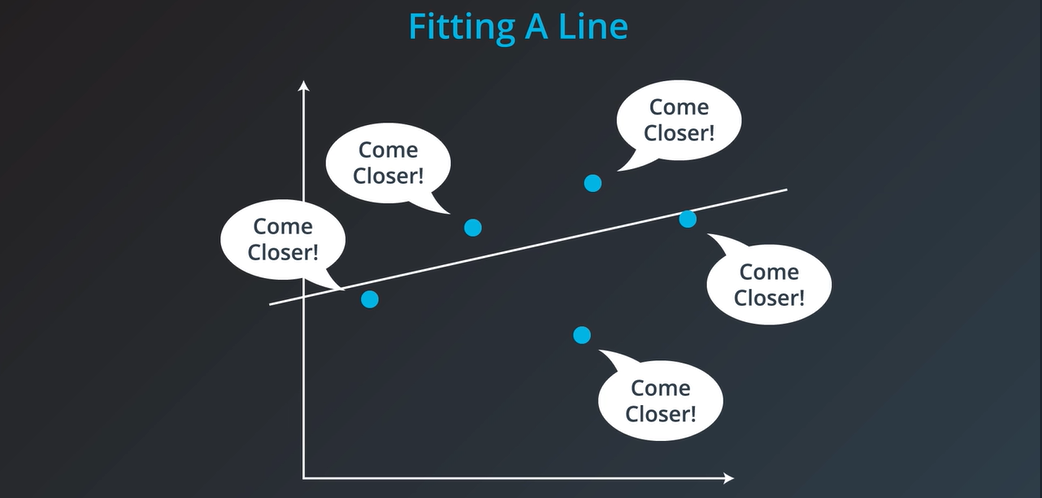

### Absolute Trick

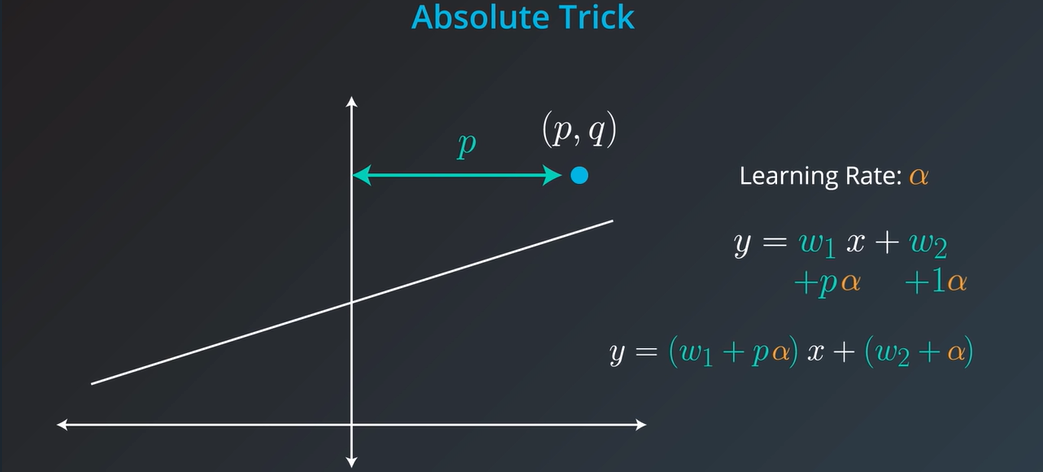

### Square Trick

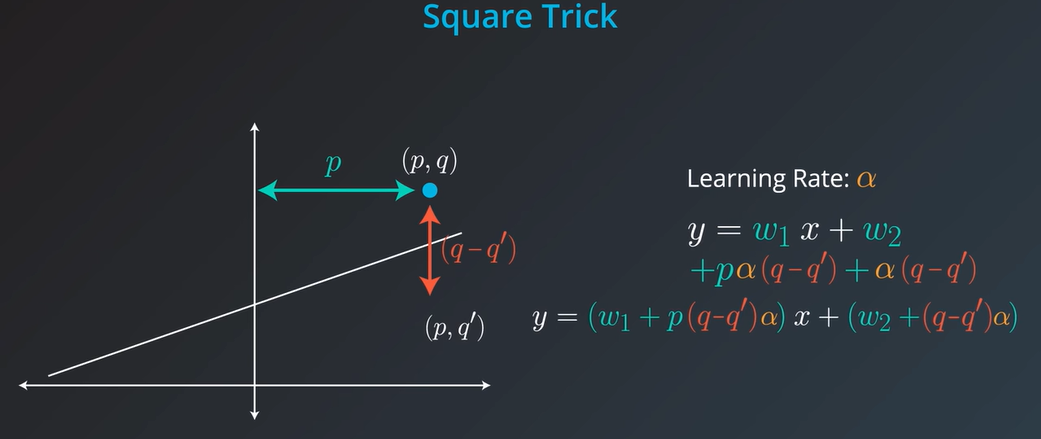

### Gradient Descent

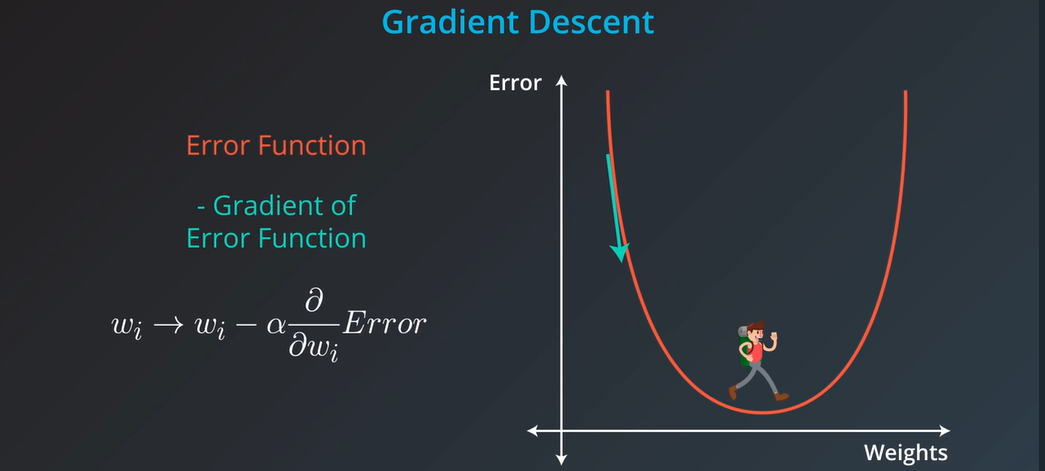

## Error Functions

### Mean Absolute Error

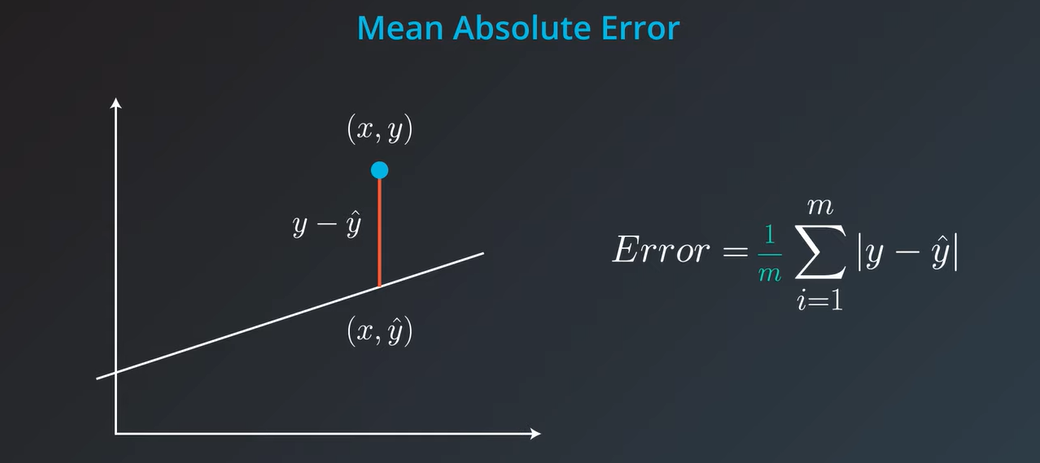

### Mean Square Error

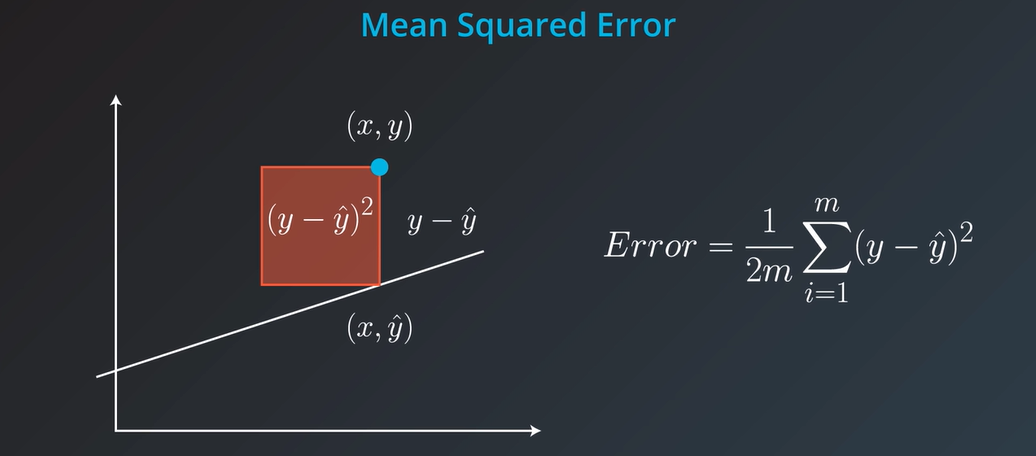

### Development of the derivative of the error function
Notice that we've defined the squared error to be

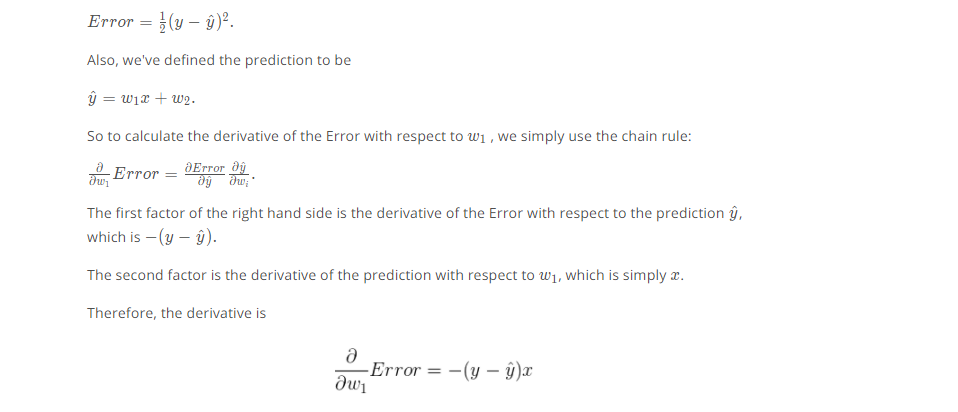


### Mean vs Total Squared (or Absolute) Error
A potential confusion is the following: How do we know if we should use the mean or the total squared (or absolute) error?

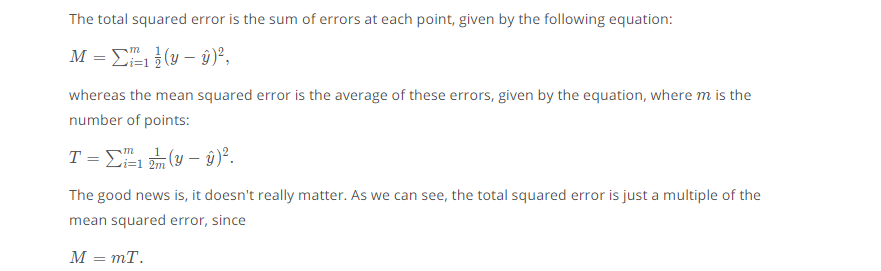

Therefore, since derivatives are linear functions, the gradient of T is also mm times the gradient of M.

However, the gradient descent step consists of subtracting the gradient of the error times the learning rate \alphaα. Therefore, choosing between the mean squared error and the total squared error really just amounts to picking a different learning rate.

In real life, we'll have algorithms that will help us determine a good learning rate to work with. Therefore, if we use the mean error or the total error, the algorithm will just end up picking a different learning rate.

### Batch vs Stochastic Gradient Descent
At this point, it seems that we've seen two ways of doing linear regression.

- By applying the squared (or absolute) trick at every point in our data one by one, and repeating this process many times.
- By applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times. <br>

More specifically, the squared (or absolute) trick, when applied to a point, gives us some values to add to the weights of the model. We can add these values, update our weights, and then apply the squared (or absolute) trick on the next point. Or we can calculate these values for all the points, add them, and then update the weights with the sum of these values.

The latter is called *batch gradient descent*. The former is called *stochastic gradient descent*.

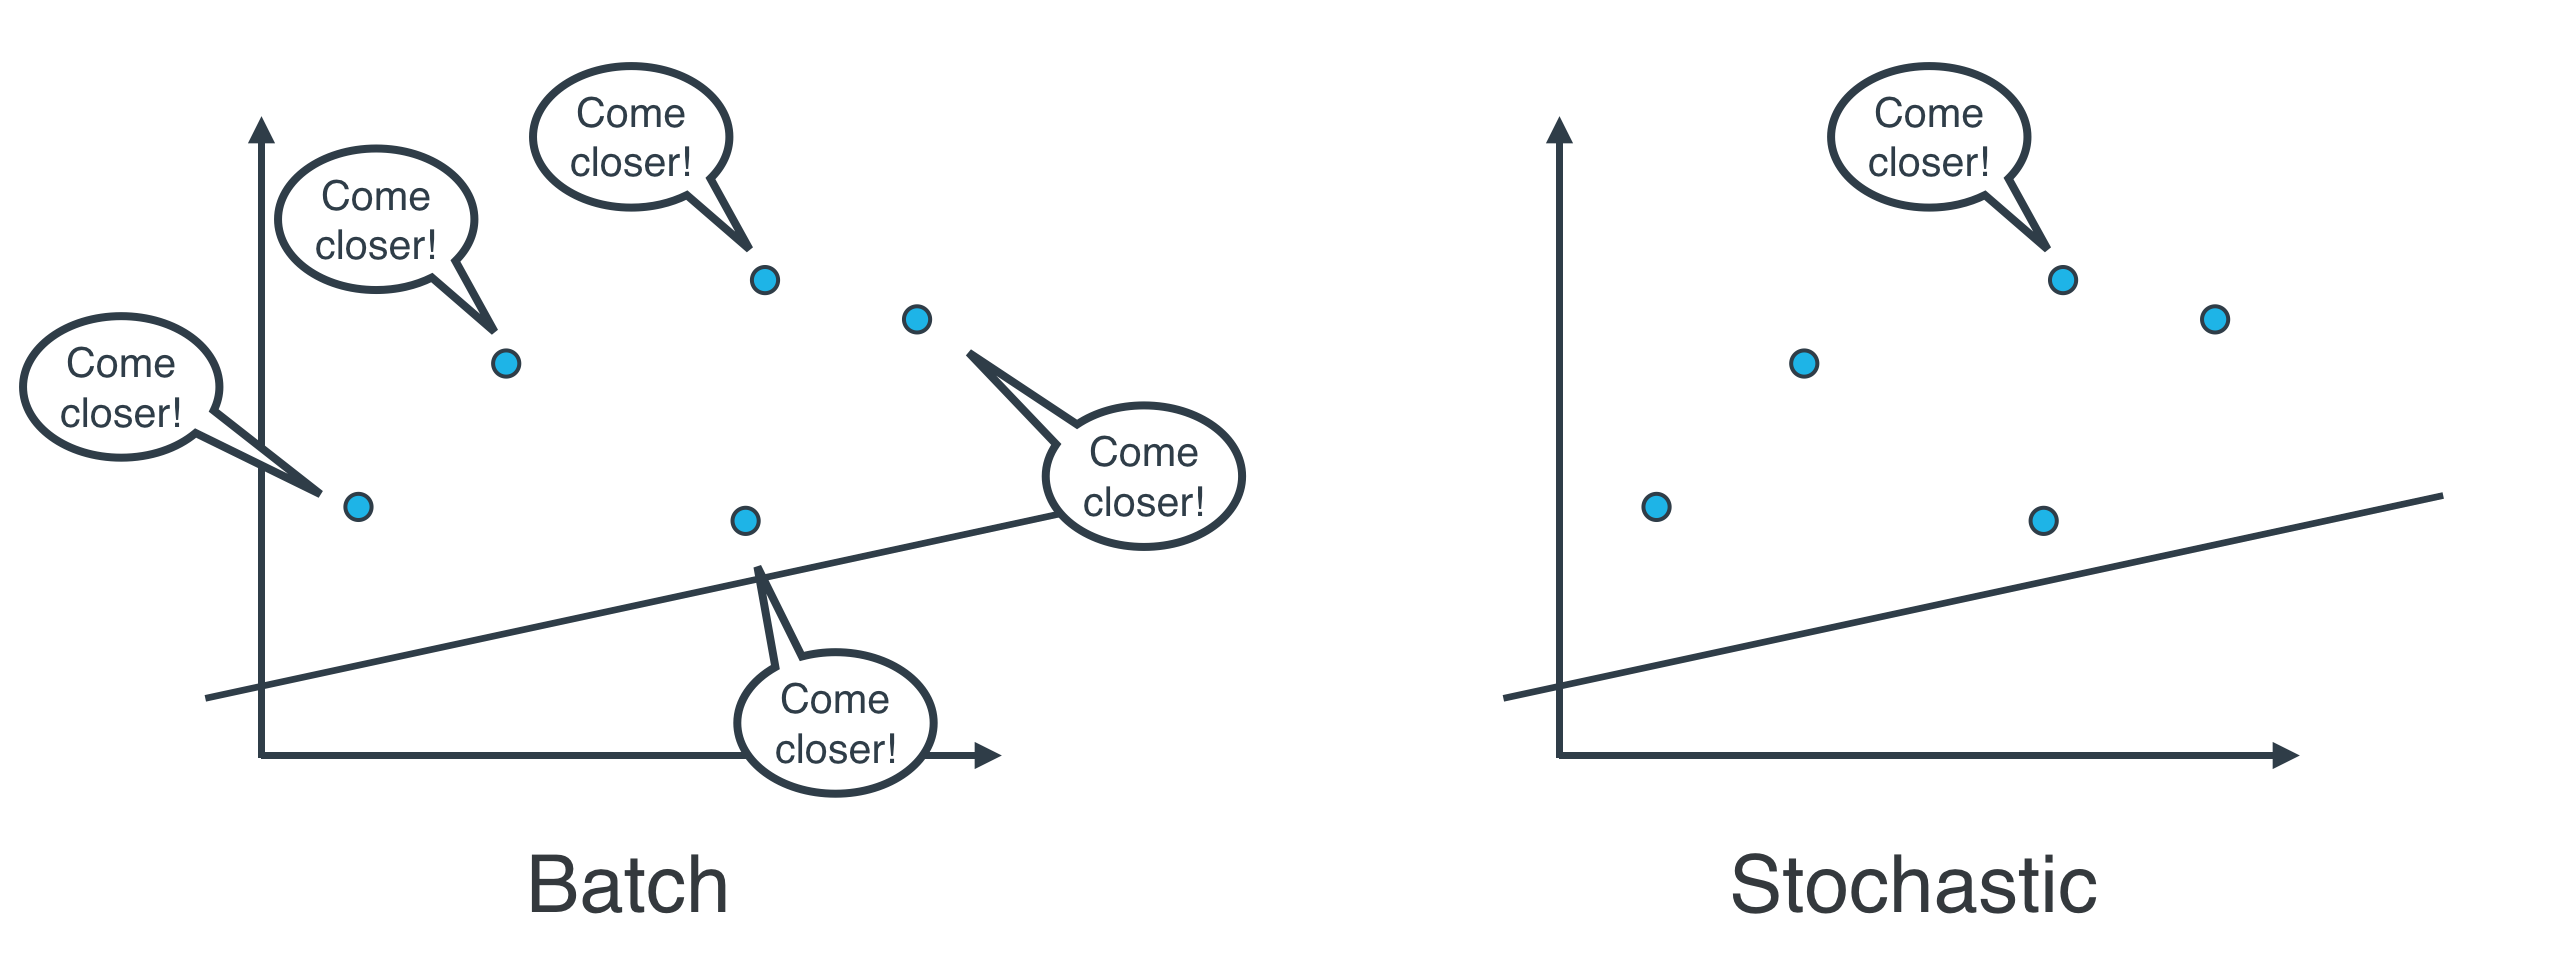

The question is, which one is used in practice?

Actually, in most cases, neither. Think about this: If your data is huge, both are a bit slow, computationally. The best way to do linear regression, is to split your data into many small batches. Each batch, with roughly the same number of points. Then, use each batch to update your weights. This is still called mini-batch gradient descent.
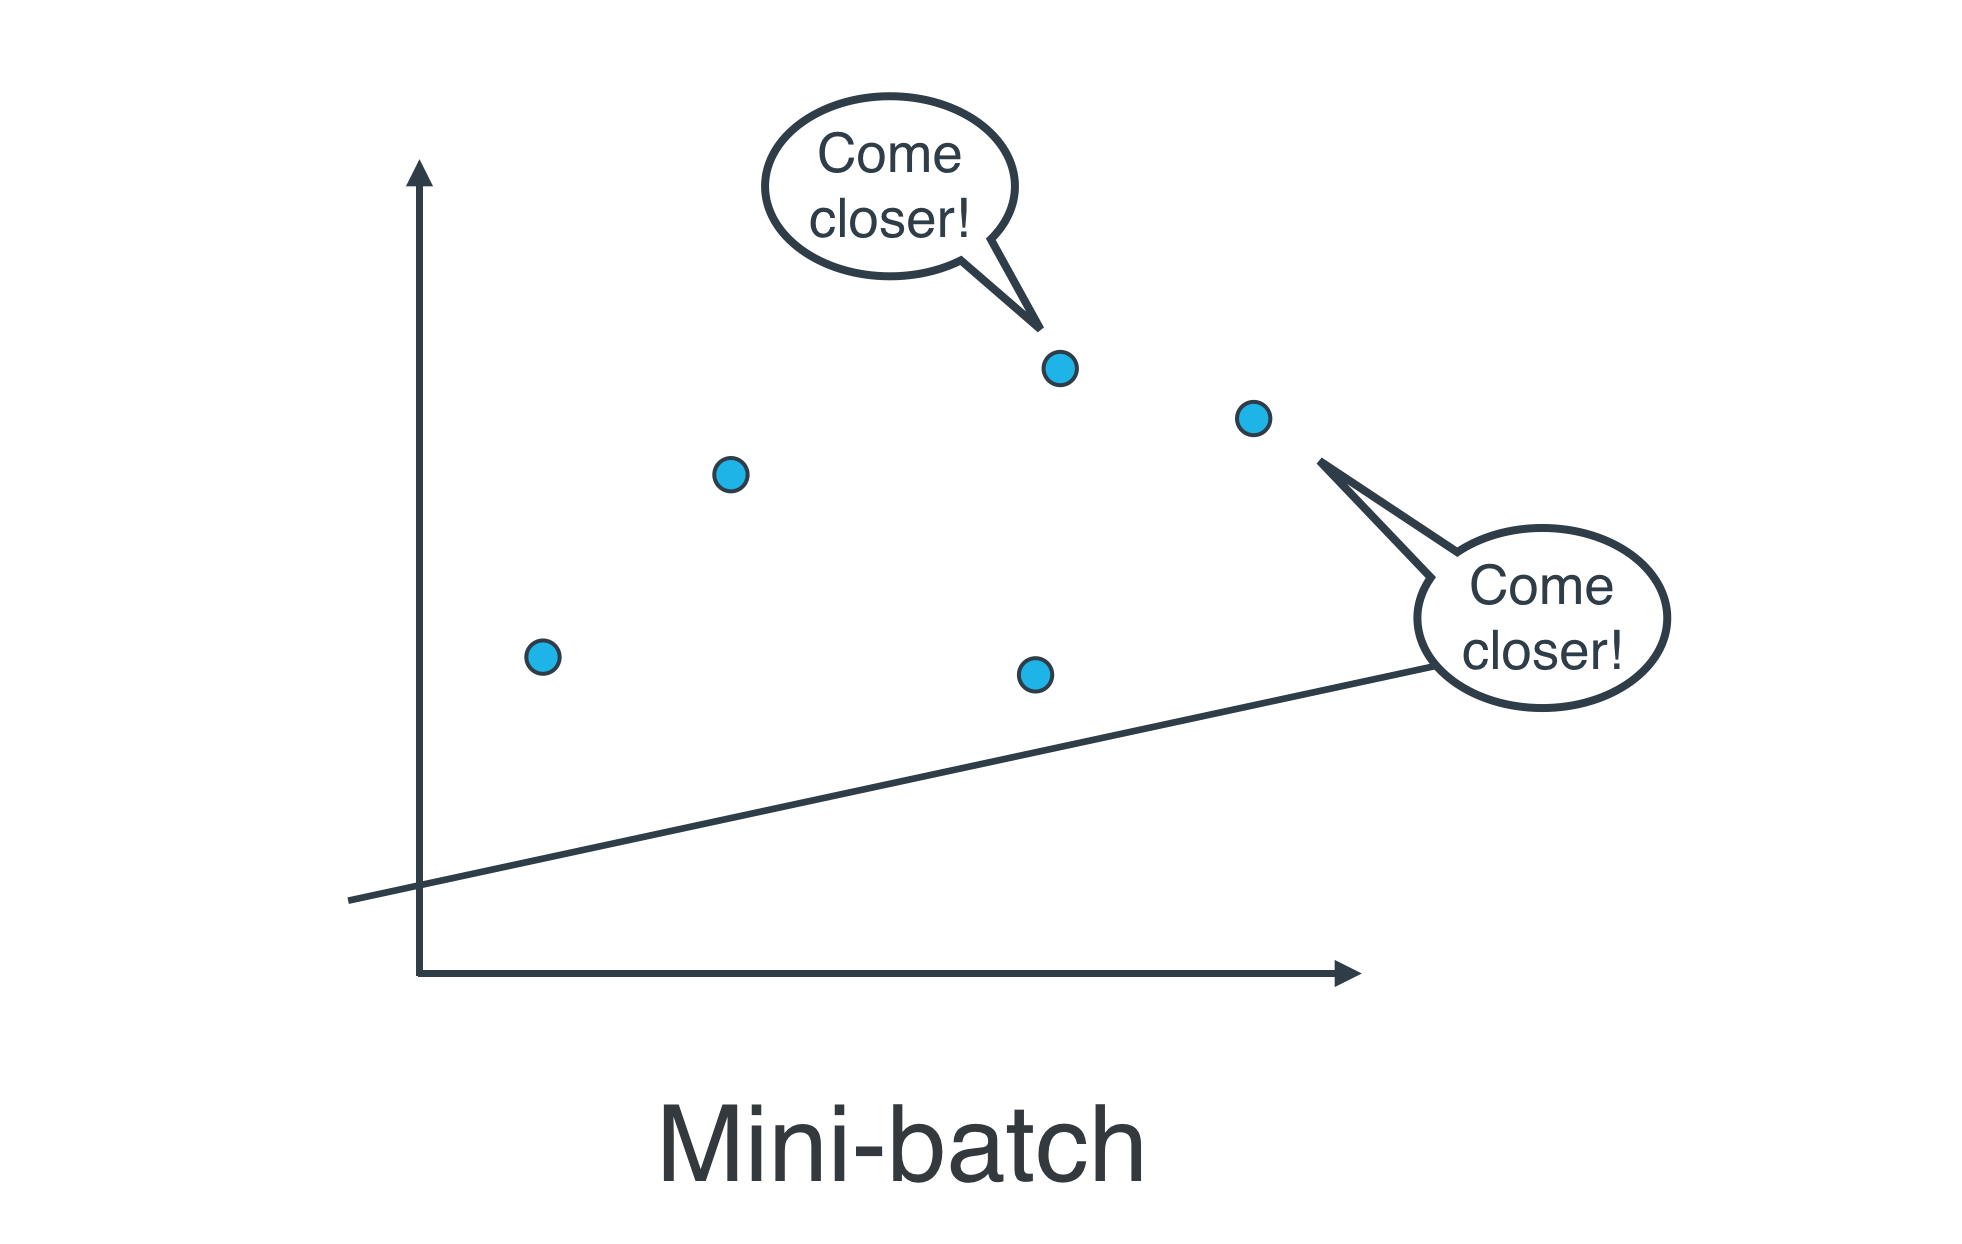

## Lesson 2.16 Mini-Batch Gradient Descent 

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(50)

In [58]:
data = np.loadtxt('datasets/batch_gradient.csv', delimiter = ',')

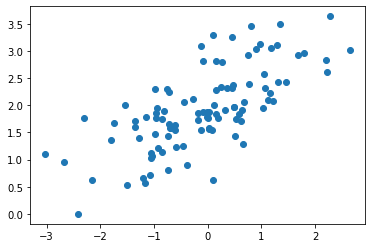

In [60]:
df = pd.DataFrame(data)

plt.scatter(df[0], df[1])
plt.show()

In [70]:
# step for linear regression, following a squared error rule. See the docstring for parameters and returned variables.


def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
     # compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # compute steps
    W_new = W + learn_rate * np.matmul(error, X)
    b_new = b + learn_rate * error.sum()
    return W_new, b_new

In [80]:
# The gradient descent step will be performed multiple times on the provided dataset, and the returned list of
# regression coefficients will be plotted.


def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

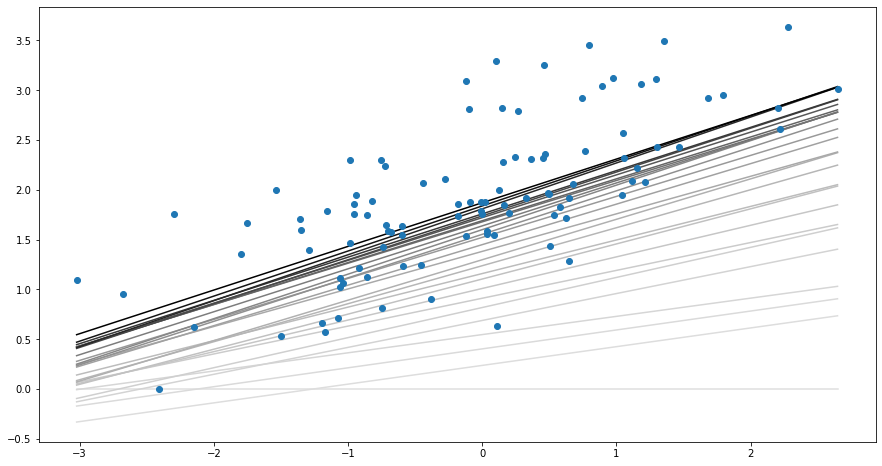

In [92]:
if __name__ == "__main__":
    
    # perform gradient descent
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    
    plt.figure(figsize=(15,8))
    
    X_min = X.min()
    X_max = X.max()
    
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

## Lesson 2.18 Linear Regression in scikit-learn

- `from sklearn.linear_model import LinearRegression`
- `model = LinearRegression()`
- `model.fit(x_values, y_values)`


### Linear Regression Quiz

The data file can be found under the `"datasets/bmi_and_life_expectancy.csv"` tab in the quiz below. It includes three columns, containing the following data:

- Country – The country the person was born in.
- Life expectancy – The average life expectancy at birth for a person in that country.
- BMI – The mean BMI of males in that country.

In [93]:
import pandas as pd

from sklearn.linear_model import LinearRegression

In [94]:
# Assign the dataframe to this variable.
bmi_life_data = pd.read_csv("datasets/bmi_and_life_expectancy.csv")

bmi_life_data.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [14]:
bmi_life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          163 non-null    object 
 1   Life expectancy  163 non-null    float64
 2   BMI              163 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [15]:
bmi_life_data.describe()

,Life expectancy,BMI
count,163.000000,163.000000
mean,69.666933,24.792378
std,8.981933,2.427900
min,44.500000,19.866920
25%,63.450000,22.527940
50%,71.800000,25.320540
75%,76.500000,26.603960
max,84.600000,30.995630


In [16]:
# Make and fit the linear regression model

bmi_life_model = LinearRegression()

bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

LinearRegression()

In [118]:
y_pred = np.array(21.07931).reshape(-1,1)
y_pred.shape

(1, 1)

In [119]:
# Mak a prediction using the model and  Predict life expectancy for a BMI value of 21.07931

laos_life_exp = bmi_life_model.predict(y_pred)
laos_life_exp

array([[60.31564716]])

## Lesson 2.20 Multiple Linear Regression

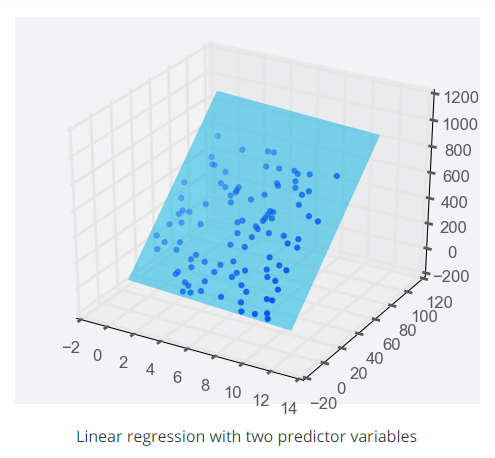

### Multiple Linear Regression Quiz

In this quiz, we'll be using the Boston house-prices dataset. The dataset consists of 13 features of 506 houses and the median home value in $1000's. We'll fit a model on the 13 features to predict the value of the houses.

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [124]:
# Load the data from the boston house-prices dataset 

boston_data = load_boston()

x = boston_data['data']
y = boston_data['target']

In [125]:
# Make and fit the linear regression model
# Fit the model and assign it to the model variable

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [126]:
# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]

# Predict housing price for the sample_house
prediction = model.predict(sample_house)
prediction

array([23.68284712])

## Lesson 2.20 Closed form Solution Math

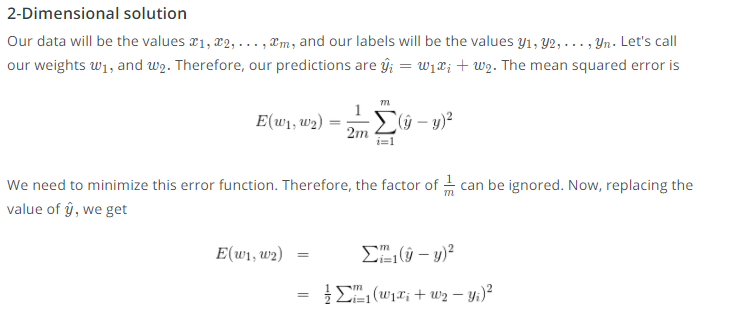
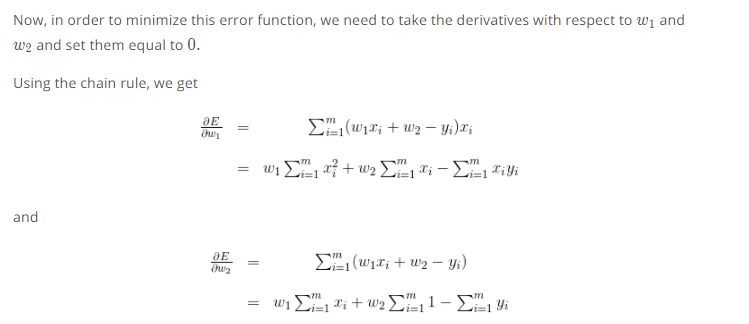
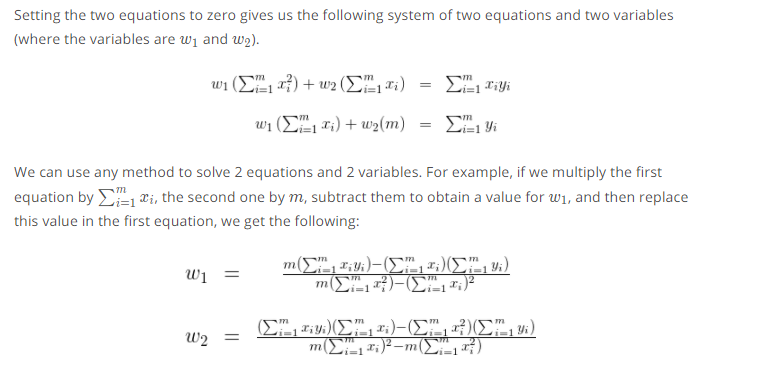
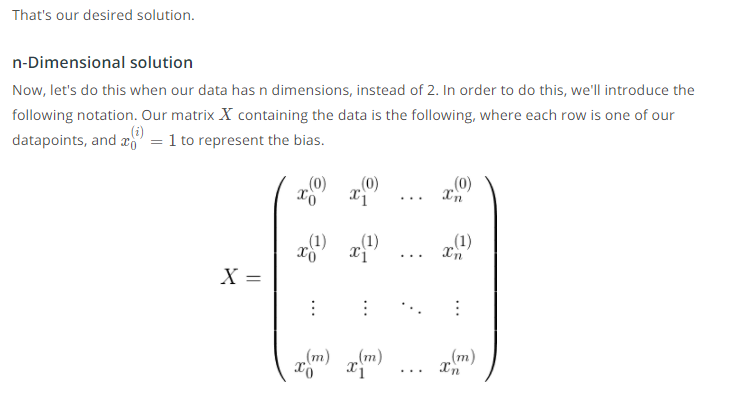
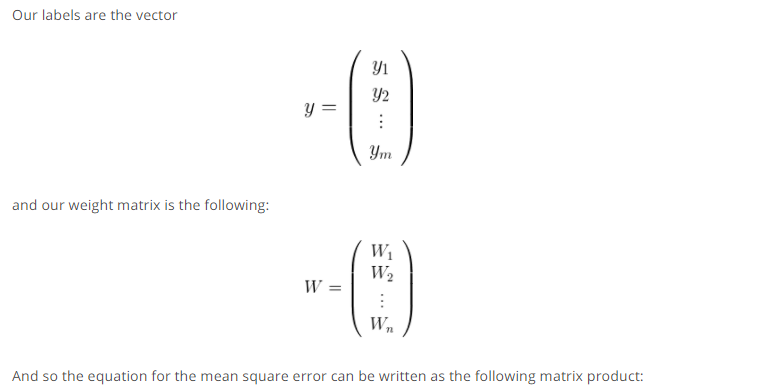
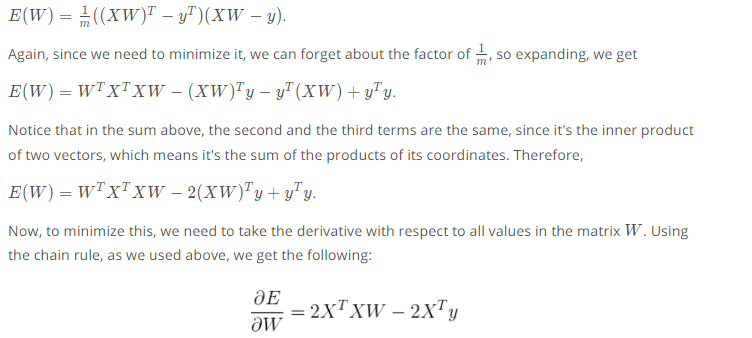
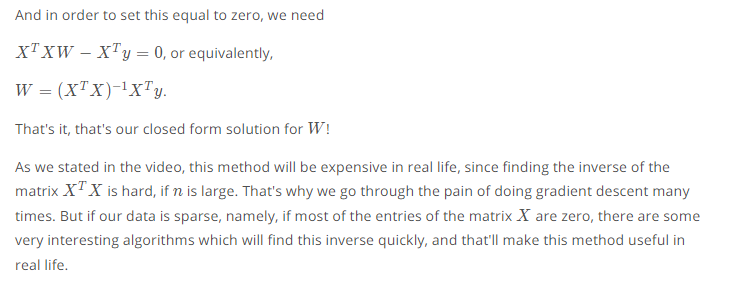

## Lesson2.25 Polynomial Regression

In [128]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [129]:
train_data = pd.read_csv('datasets/polynomial .csv')

In [130]:
X = train_data['Var_X'].values.reshape(-1, 1)

y = train_data['Var_Y'].values

In [131]:
# Create a PolynomialFeatures object, then fit and transform the predictor feature

poly_feat = PolynomialFeatures(degree = 4)

X_poly = poly_feat.fit_transform(X)

In [31]:
# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)
poly_model

LinearRegression(fit_intercept=False)

## Lesson 2.27 Regularization

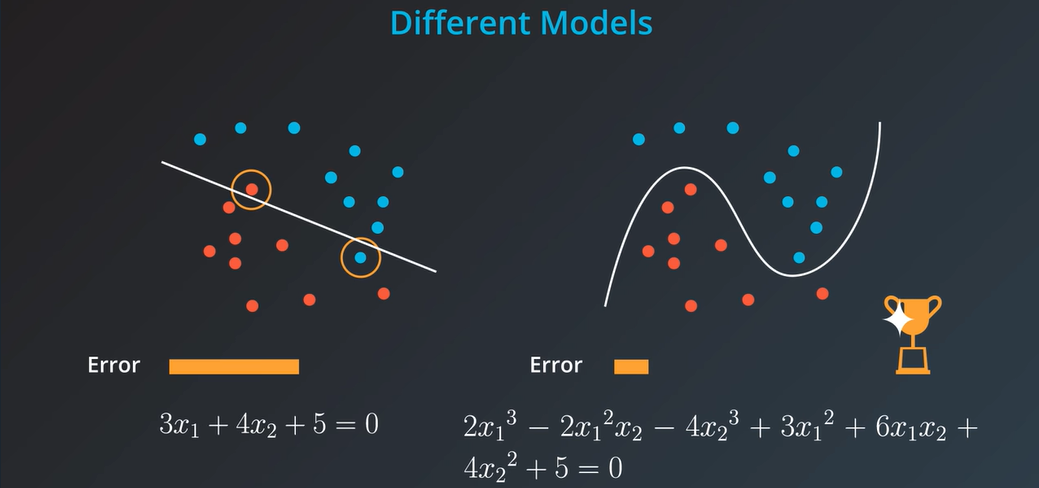

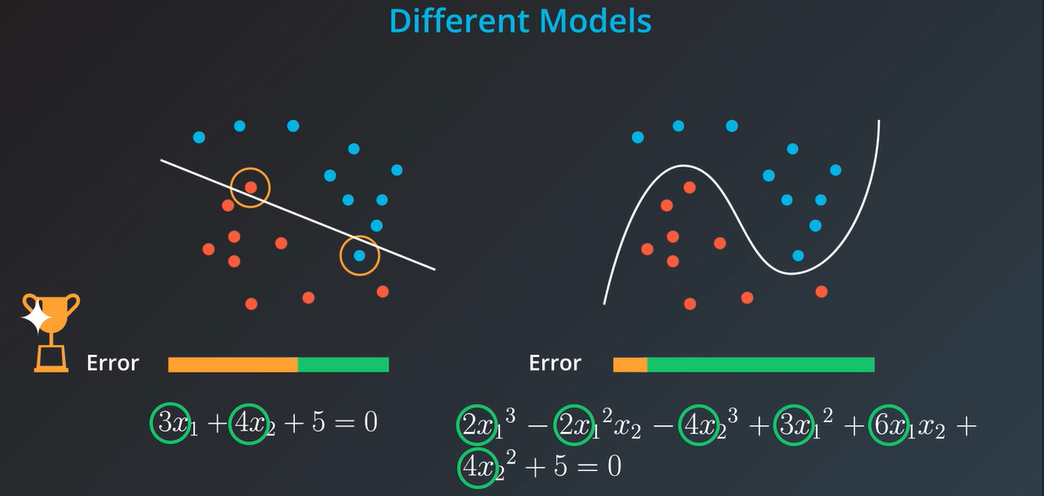

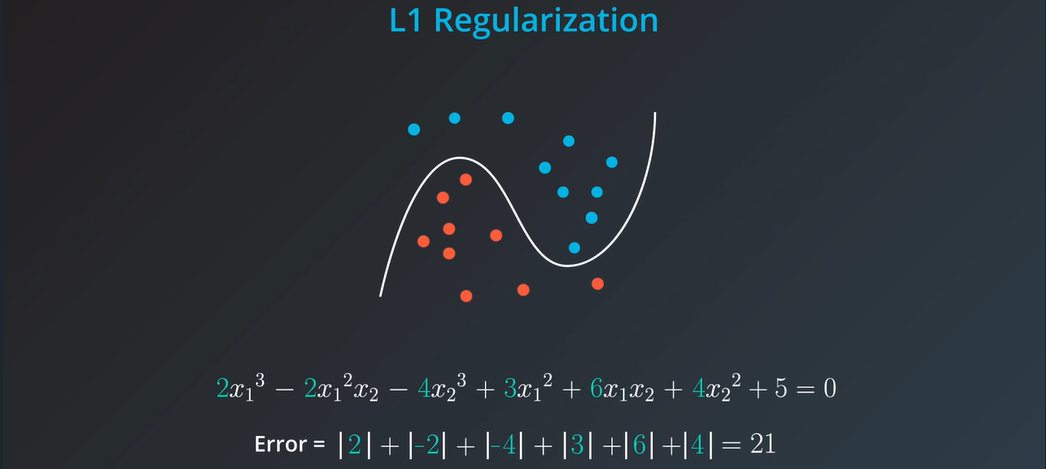

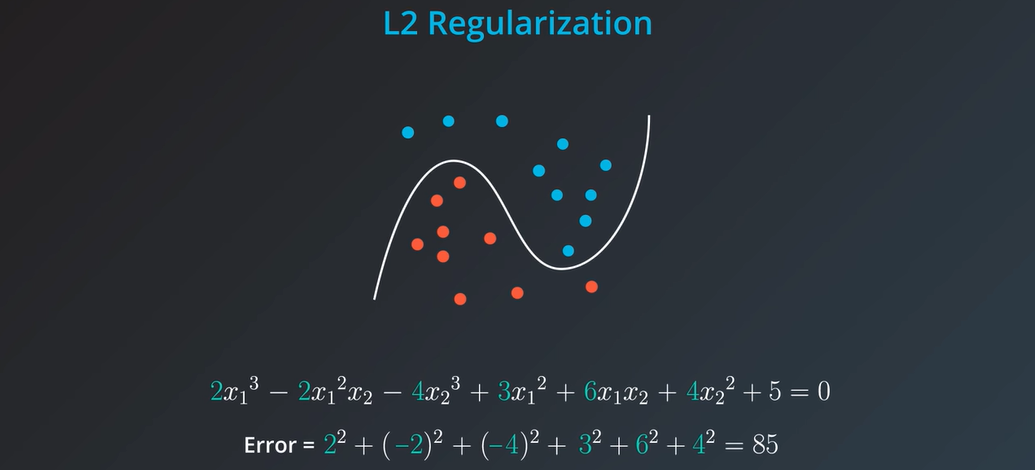

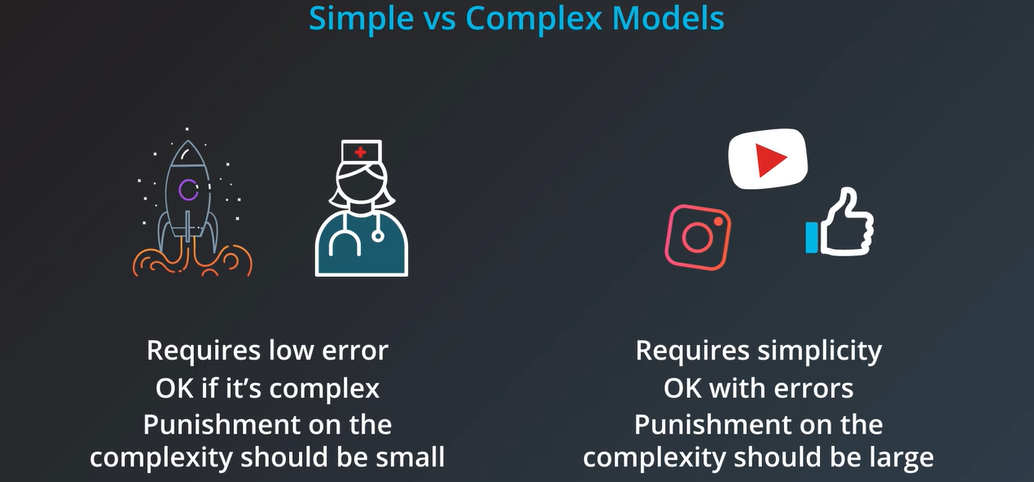

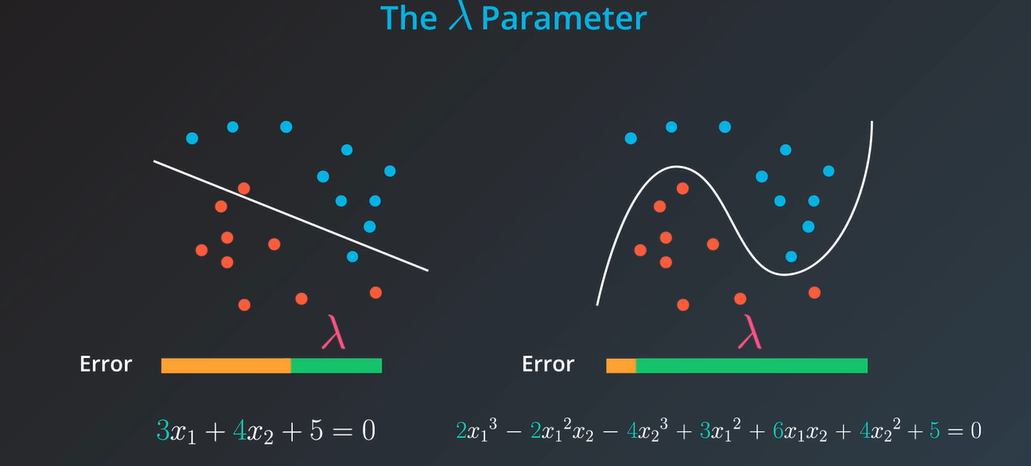

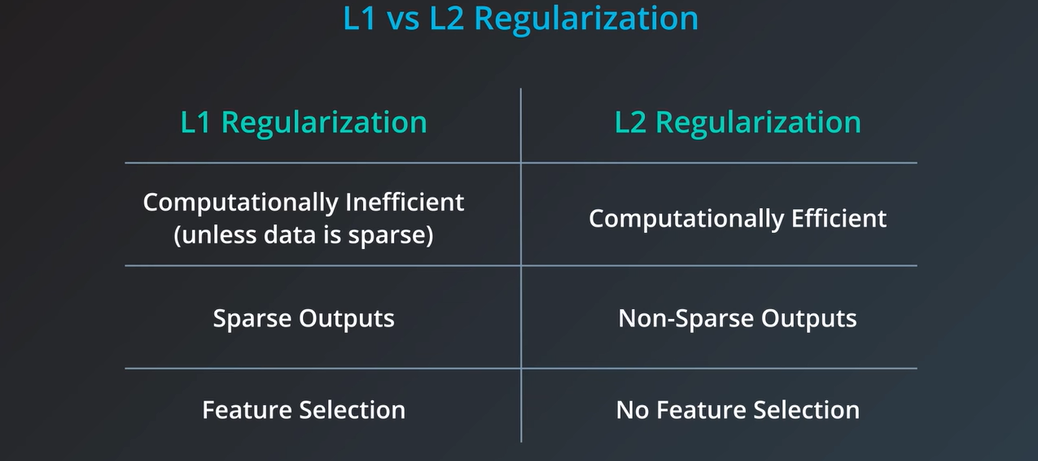

In [132]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso

In [133]:
train_data = pd.read_csv('datasets/regularization_data.csv', header = None)

X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [134]:
# Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X, y)


Lasso()

In [135]:
# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_

print(reg_coef)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


## Lesson 2.28 Feature Scaling


What is feature scaling? <br> 
Feature scaling is a way of transforming your data into a common range of values. There are two common scalings:
- Standardizing <br>

`df["height_standard"] = (df["height"] - df["height"].mean()) / df["height"].std()`

- Normalizing

`df["height_normal"] = (df["height"] - df["height"].min()) / df["height"].max() - df['height'].min()) `


[A useful Quora post on the importance of feature scaling when using regularization.](https://www.quora.com/Why-do-we-normalize-the-data)

In [38]:
import numpy as np
import pandas as pd

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [39]:
train_data = pd.read_csv('datasets/regularization_data.csv', header = None)

X = train_data.iloc[:,:-1]
y = train_data.iloc[:,-1]

In [41]:
# Create the standardization scaling object.
scaler = StandardScaler()

# Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

In [42]:
# Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# Fit the model.
lasso_reg.fit(X_scaled, y)

# Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]
